In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
print(np.__version__)
print(pd.__version__)
print(tf.__version__)

1.21.6
1.3.5
2.9.2


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Pokemon.csv to Pokemon (1).csv


In [ ]:
data = pd.read_csv('Pokemon.csv' , names = ['Name','Type1','Type2','HP','Defense','sp.Def'])
data.head()

,Name,Type1,Type2,HP,Defense,sp.Def
0,Bulbasaur,Grass,Poison,45,49,65
1,Ivysaur,Grass,Poison,60,63,80
2,Venusaur,Grass,Poison,80,83,100
3,VenusaurMega Venusaur,Grass,Poison,80,123,120
4,Charmander,Fire,NaN,39,43,50


(800,) (800,)


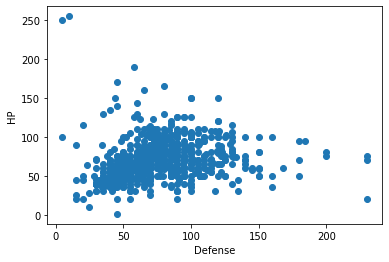

In [ ]:
# data
y_data = data['HP']
x_data = data['Defense']
print(x_data.shape, y_data.shape)

plt.plot(x_data, y_data,'o')
plt.xlabel('Defense')
plt.ylabel('HP')
plt.show()

In [ ]:
# data
y_data = y_data.values
x_data = x_data.values

In [ ]:
# initial values
W = tf.Variable(tf.random.normal([1], mean=1.0), name='weight')
b = tf.Variable(tf.random.normal([1], mean=1.0), name='bias')

# hypothesis
def hypothesis(x):
    return W * x + b

# cost function
def cost(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))


# train
optimizer = tf.optimizers.SGD(learning_rate=0.00001)
loss_record = []
def train(X,Y):
    with tf.GradientTape() as g:
        pred = hypothesis(X) # make prediction
        loss = cost(pred, Y) # calculate loss,  #print('loss=', loss.numpy())
        loss_record.append(loss.numpy())
    
    # calculate gradients
    gradients = g.gradient(loss, [W,b]) # dloss/dW, dloss/db
    optimizer.apply_gradients(zip(gradients, [W,b])) # W : W - a*dcost/dW

for step in range(10001):
    train(x_data, y_data)
    
    if step % 2000 == 0:
        pred = hypothesis(x_data)  
        loss = cost(pred, y_data) 
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss.numpy(), W.numpy(), b.numpy()))
        
print(f'y = {W.numpy()}x + {b.numpy()}')

step: 0, loss: 2618.308838, W: 1.297943, b: 2.149615
step: 2000, loss: 1027.481812, W: 0.797514, b: 2.461154
step: 4000, loss: 1022.509399, W: 0.793889, b: 2.776488
step: 6000, loss: 1017.596741, W: 0.790286, b: 3.089922
step: 8000, loss: 1012.742981, W: 0.786704, b: 3.401467
step: 10000, loss: 1007.947571, W: 0.783145, b: 3.711137
y = [0.78314465]x + [3.7111368]


In [ ]:
# performance(모형 성과 평가)
from sklearn.metrics import r2_score, mean_squared_error
y_pred = hypothesis(x_data)

R2 = r2_score(y_data, y_pred)
print(R2)

mse = mean_squared_error(y_data, y_pred)
print(mse)



-0.5478209978924911
1007.9476870394108


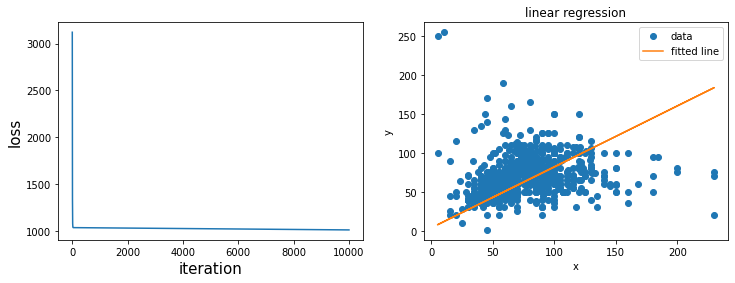

In [ ]:
# draw loss
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
#plt.show()

# fitting line
yhat = hypothesis(x_data)
#plt.figure(figsize = (5,3))
plt.subplot(122)
plt.plot(x_data, y_data, 'o', label = 'data')
plt.plot(x_data, yhat, label = 'fitted line')  # np.array(W*x_data+b)
plt.title('linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()